# Demo avec Gradio

Ce notebook va présente, en un exemple, la library [gradio](https://www.gradio.app/) qui permet de créer des interfaces de démos très simplement. 

## Interface de détection d'objets

Pour cet exemple, nous allons utiliser un modèle de détection d'objets dans une image entrainé sur les 80 classes du dataset [COCO](https://cocodataset.org/#home).  
Nous utilisons le modèle [DETR](https://research.facebook.com/publications/end-to-end-object-detection-with-transformers/) de meta. 

### Implémentation

Tout d'abord, construisons notre pipeline à l'aide de la library transformers de Hugging Face.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline
import cv2
import numpy as np

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
detector = pipeline("object-detection", "facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


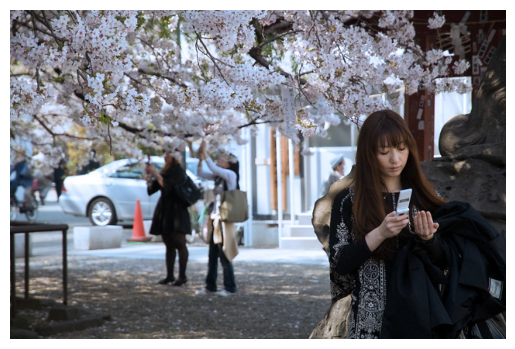

In [3]:
image = Image.open('images/coco3.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

Procédons à la détection et dessinons les boites. Pour avoir un résultat clair, on ne va dessiner entourer que les personnes. Vous pouvez enlever ce filtre si vous voulez.

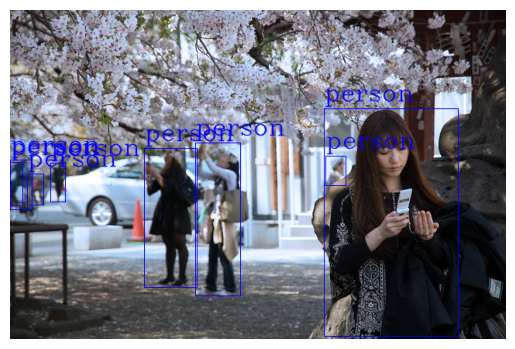

In [4]:
def draw_boxes(image,output):
    cv_image = np.array(image)
    for bbox in output:
        box = bbox['box']
        label = bbox['label']
        if (label!="person"):
            continue
        cv2.rectangle(cv_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 1)
        cv2.putText(cv_image, label, (box['xmin'], box['ymin'] - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
    return cv_image

output = detector(image)
cv_image=draw_boxes(image,output)
plt.imshow(cv_image)
plt.axis('off')
plt.show()


### Démo gradio

C'est maintenant le moment de construire notre démo avec gradio. L'idée sera d'avoir une interface qui prend une image en entrée et renvoie la même image avec les personnes entourées.

In [5]:
import gradio as gr

In [6]:
def get_pipeline_prediction(pil_image):
    pipeline_output = detector(pil_image)
    processed_image = draw_boxes(pil_image,pipeline_output)
    return processed_image

In [7]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Image d'entrée",type="pil"),
  outputs=gr.Image(label="Image avec les personnes détectées",type="pil")
)

IMPORTANT: You are using gradio version 4.24.0, however version 4.29.0 is available, please upgrade.
--------


In [8]:
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Et voilà, vous avez construit votre propre démo. Il est possible de la partager en activant le paramètre share=True de la méthode launch(). Par contre, il faudra garder votre notebook actif sinon la démo disparaitra. Pour faire une démo qui ne vous contraint pas à garder votre pc allumé, vous pouvez créer un space sur le site de Hugging Face (voir notebook 1).   

**Notes** : Bien sûr, gradio possède plus de fonctionnalités que ça. Je vous invite à regarder la [documentation](https://www.gradio.app/docs) et les différents [tutoriels](https://www.gradio.app/guides/quickstart) si vous avez un besoin particulier.